In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
airbnb = pd.read_csv('playoffs_train.csv')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,floor,price
0,23612284,"Spacious, sunny duplex in Fort Greene, Brooklyn",2485076,Jacob,Brooklyn,Fort Greene,40.69466,-73.97151,Entire home/apt,1,203.580070
1,7339716,Perfect West Village Apt,36625404,Jeff,Manhattan,West Village,40.73545,-74.00686,Entire home/apt,16,535.242924
2,25801507,Beautiful South Park Slope Brooklyn Apartment,17075886,Zipi,Brooklyn,Sunset Park,40.66132,-73.99192,Entire home/apt,1,195.728937
3,26594677,Wyndham Midtown 45 @ NYC,46555645,Jennifer,Manhattan,Midtown,40.75357,-73.97313,Private room,16,264.265776
4,4824146,Spacious Apt in Bushwick,24840863,Daniel,Brooklyn,Bushwick,40.70092,-73.92945,Entire home/apt,16,250.264475
...,...,...,...,...,...,...,...,...,...,...,...
35568,14016206,Williamsburg! 1 stop from Manhattan with backy...,18881301,Brittany,Brooklyn,Williamsburg,40.71091,-73.96029,Private room,1,99.996339
35569,10732870,Private Bedroom in the Heights,53224546,Zachory,Manhattan,Washington Heights,40.83365,-73.94459,Private room,1,127.360873
35570,24204338,Private Cozy Room on Manhattan,63929490,Lidziya,Manhattan,East Harlem,40.78719,-73.95201,Private room,16,251.616829
35571,16244096,Room for rent in Brooklyn. 1 block from R train,106197850,Jamie,Brooklyn,Sunset Park,40.64318,-74.01329,Private room,1,88.337220


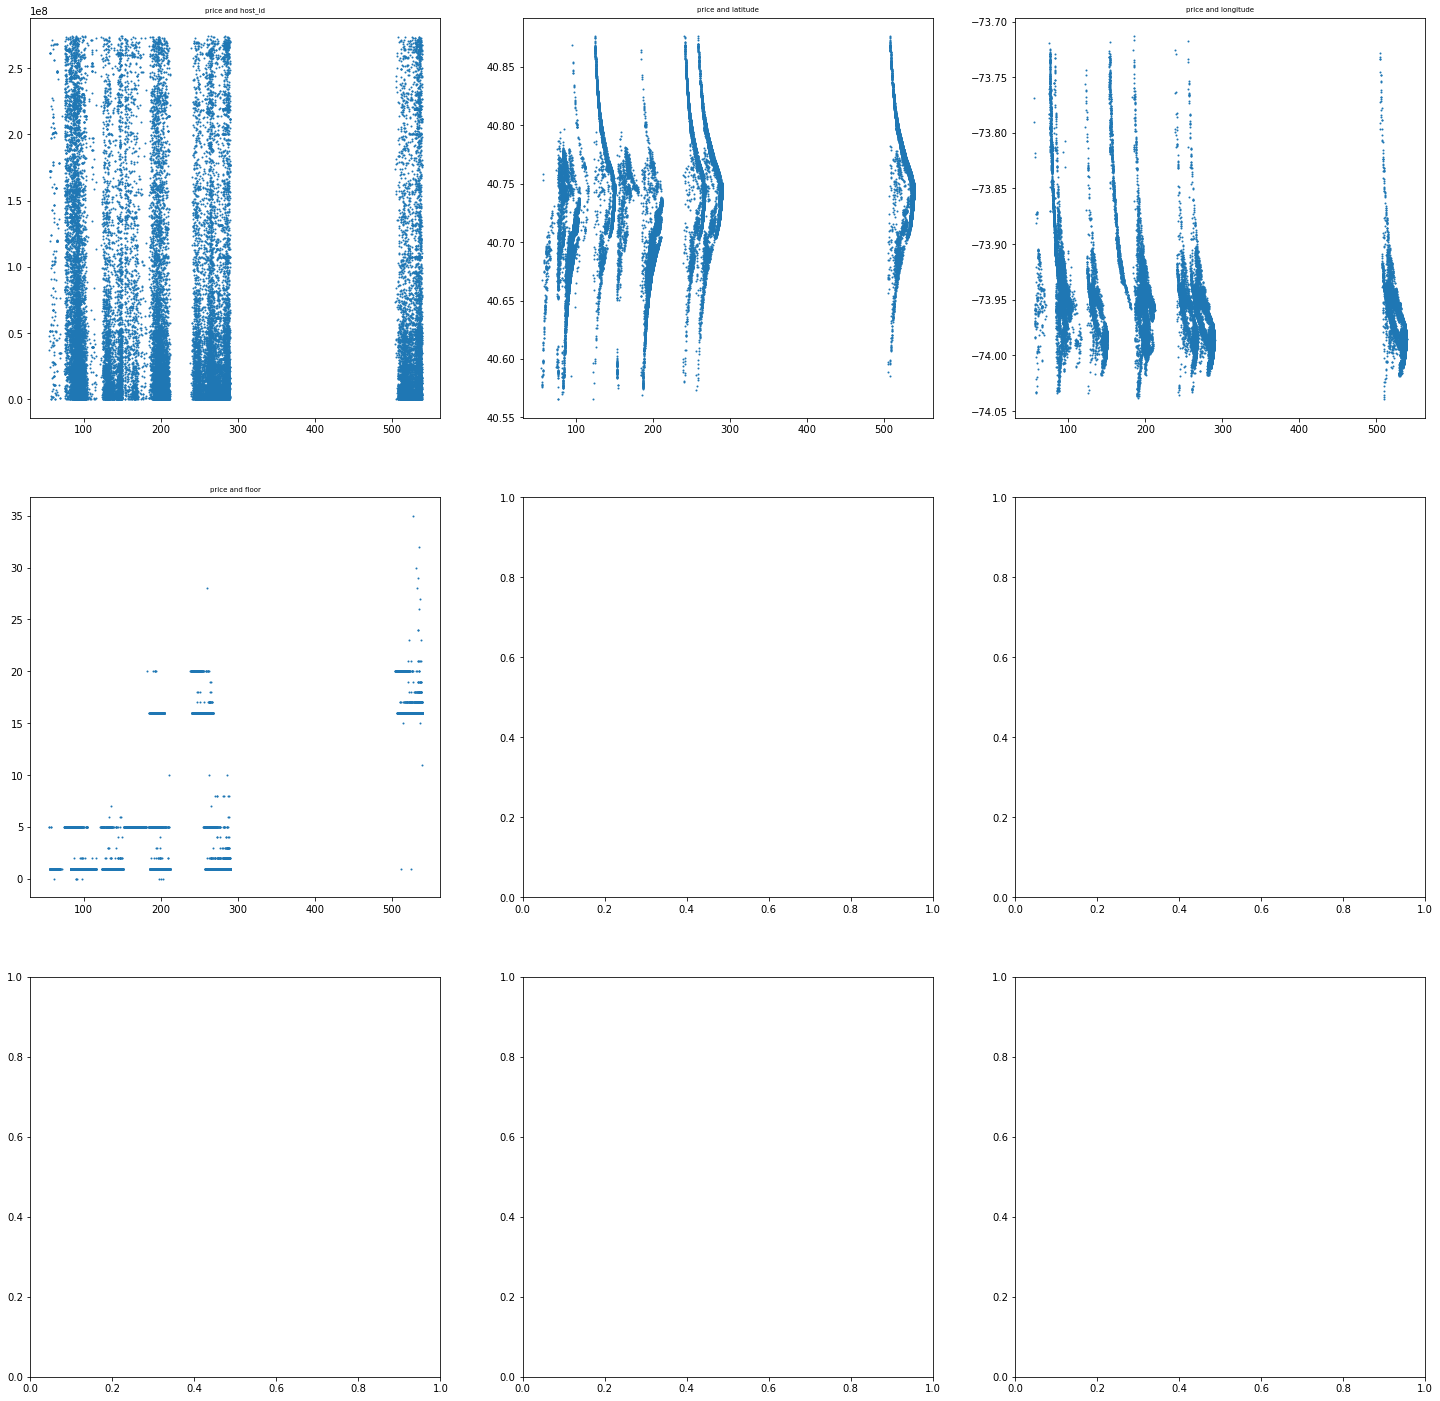

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(25, 25))

x = 0
y = 0

for i in airbnb:
    if i != 'price':
        continue
    for j in airbnb:
        if i == j:
            continue
        if airbnb[j].map(type).eq(str).any() or j == 'id' or j == 'host   id':
            continue
        #a, b = np.polyfit(airbnb[i], airbnb[j], 1)
        axs[x,y].scatter(airbnb[i],airbnb[j],s=1)
        #axs[x,y].plot(airbnb[i], a*airbnb[j]+b,color='deepskyblue')
        temp = " and "
        title = i + temp + j
        axs[x, y].set_title(title,fontsize=7)
        y += 1
        if y > 2:
            x +=1
            y = 0

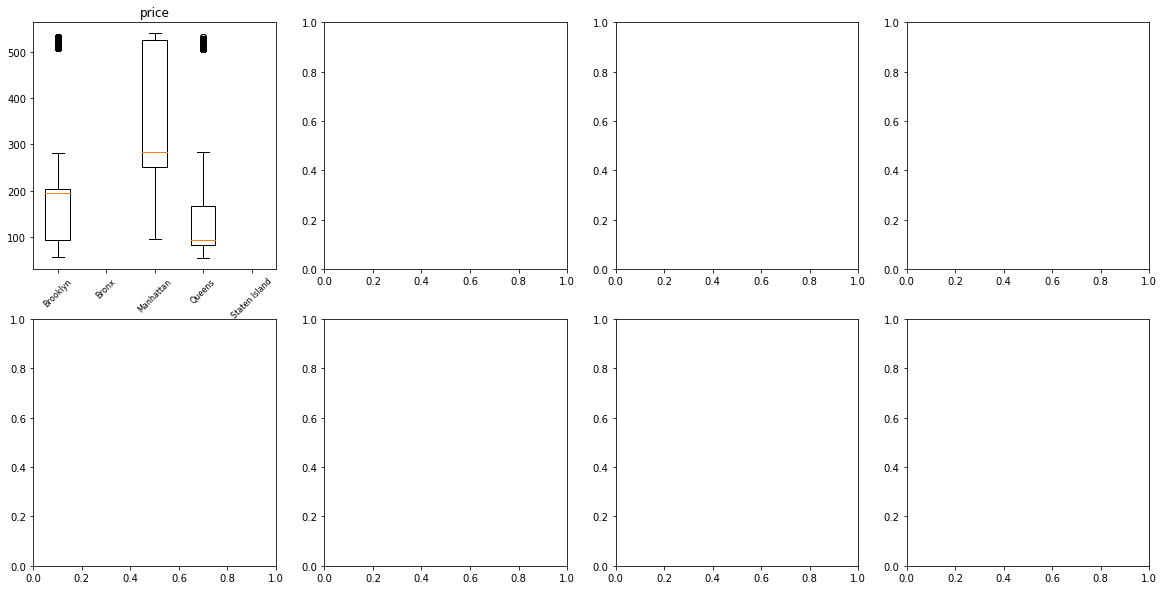

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

x = 0
y = 0

for i in airbnb:
    if i != 'price':
        continue
    Brooklyn = airbnb.loc[(airbnb['neighbourhood_group'] == 'Brooklyn')]
    Bronx = airbnb.loc[(airbnb['neighbourhood_group'] == 'Bronx')]
    Manhattan = airbnb.loc[(airbnb['neighbourhood_group'] == 'Manhattan')]
    Queens = airbnb.loc[(airbnb['neighbourhood_group'] == 'Queens')]
    Staten = airbnb.loc[(airbnb['neighbourhood_group'] == 'Staten Island')]
    axs[x,y].boxplot([Brooklyn[i],Bronx[i],Manhattan[i],Queens[i],Staten[i]])
    axs[x, y].set_title(i)
    ticks = ['Brooklyn','Bronx','Manhattan','Queens','Staten Island']
    axs[x, y].set_xticklabels(np.repeat(ticks, 1),
                    rotation=45, fontsize=8)
    y += 1
    if y > 3:
        y = 0
        x += 1

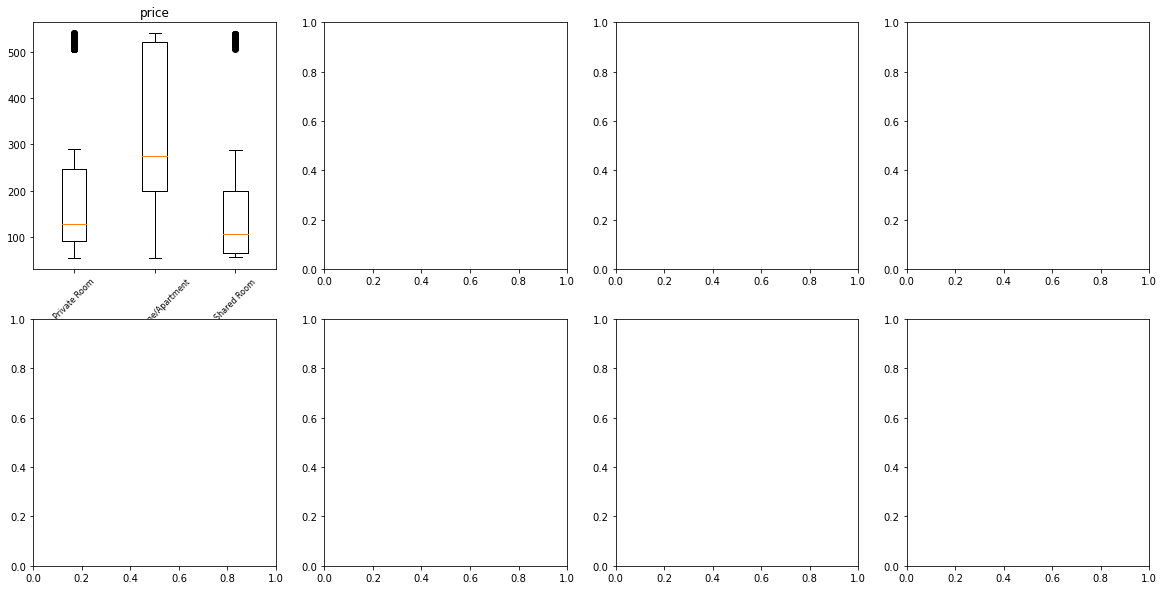

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

x = 0
y = 0

for i in airbnb:
    if i != 'price':
        continue
    Priv = airbnb.loc[(airbnb['room_type'] == 'Private room')]
    Entire = airbnb.loc[(airbnb['room_type'] == 'Entire home/apt')]
    Shared = airbnb.loc[(airbnb['room_type'] == 'Shared room')]
    axs[x,y].boxplot([Priv[i],Entire[i],Shared[i]])
    axs[x, y].set_title(i)
    ticks = ['Private Room','Entire Home/Apartment','Shared Room']
    axs[x, y].set_xticklabels(np.repeat(ticks, 1),
                    rotation=45, fontsize=8)
    y += 1
    if y > 3:
        y = 0
        x += 1